In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = '/home/adminuser/caffe-master' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [21]:
mean_filename='/home/adminuser/cnn_age_gender_models_and_data.0.0.2/mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]
my_mean=np.save('my_mean.npy', mean)
my_mean



In [24]:
age_net_pretrained='/home/adminuser/cnn_age_gender_models_and_data.0.0.2/age_net.caffemodel'
age_net_model_file='/home/adminuser/cnn_age_gender_models_and_data.0.0.2/deploy_age.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       channel_swap=(2,1,0),
                           mean=my_mean,
                       raw_scale=255,
                       image_dims=(256, 256))


In [25]:
gender_net_pretrained='/home/adminuser/cnn_age_gender_models_and_data.0.0.2/gender_net.caffemodel'
gender_net_model_file='/home/adminuser/cnn_age_gender_models_and_data.0.0.2/deploy_gender.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=my_mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [26]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

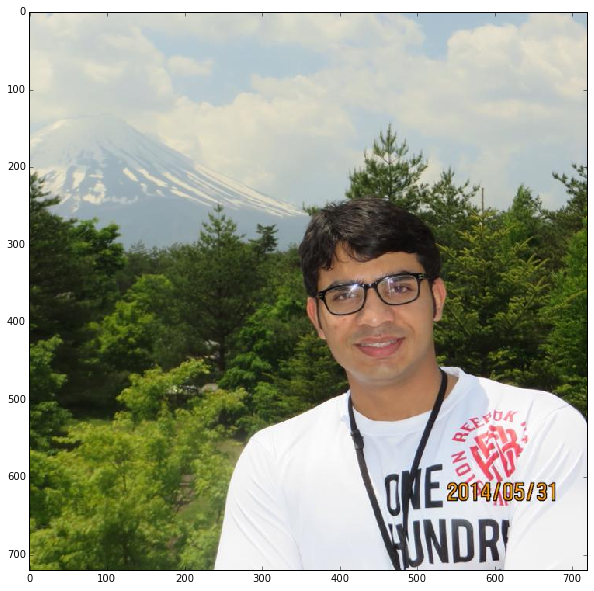

In [34]:
example_image = '/home/adminuser/cnn_age_gender_models_and_data.0.0.2/ex2_image.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [35]:
prediction = age_net.predict([input_image]) 

print 'predicted age:', age_list[prediction[0].argmax()]

predicted age: (38, 43)


In [36]:
prediction = gender_net.predict([input_image]) 

print 'predicted gender:', gender_list[prediction[0].argmax()]

predicted gender: Female
